In [1]:
from script_xarray import *

## Directorio donde están los datos, carácteristicas de la simulación, tipo de plano

In [2]:
path_to_folder=r"C:/TFM_DAVIDH_2025/Tablas/"
#caracteristicas de la simulación
ustar="ustar0.33_"
viento="NO_"
campo="PS_T_V_" #passive scalar
part="threshold_plane_z=3m"

## Eje x de las gráficas escalar-tiempo

In [3]:
vector_segundos=np.arange(3600, 3600*50,3600) #comprobar que es así en STAR-CCM+
vector_horas=["6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","1","2","3","4","5",
              "6b","7b","8b","9b","10b","11b","12b","13b","14b","15b","16b","17b","18b","19b","20b","21b","22b","23b","24b","1b","2b","3b","4b","5b","6c"]

## Variables que voy a representar

In [39]:
#variables. Deberían tener las mismas unidades
variables = ["PS1", "PS2", "PS3"] + ["Area: Magnitude (m^2)"]
#variables = ["Temperature (K)"] + ["Area: Magnitude (m^2)"]
#variables = ["Velocity: Magnitude (m/s)"] + ["Area: Magnitude (m^2)"]
#variables = ["Turbulent Kinetic Energy (J/kg)"] + ["Area: Magnitude (m^2)"]
coords = ["X (m)", "Y (m)"] #coordenadas del plano
means=np.zeros((len(vector_segundos),len(variables)-1))
means[:]=np.nan
stds=np.copy(means)

## Parámetros de la gráfica que voy a sacar

In [40]:
xaxis_name="Time"
yaxis_name=r"Concentration (mg/m3)"
title="Passive scalar concentration"
font_size=20 # tamaño de fuente para título, nombres de los ejes, etiquetas de los ejes, leyenda, etc
fig_size=(40,10) #ancho-alto de la gráfica
cap_size=15 #longitud horizontal de los sombreritos de las barras de error
cap_thick=10 #anchura de los sombreritos de las barras de error
line_width=3 #ancho de linea
marker_size=15 #tamaño del punto

ylim=(1.5,3)

#name for saving
fig_name=path_to_folder+"/borrador_graficas/"+ustar+viento+part+"_spatial_mean_PS"
formato=".png"

## Calculo las medias

In [41]:
for hour in range(len(vector_segundos)):
    print(vector_segundos[hour])
    try:
        df = pd.read_csv(path_to_folder+ustar+viento+str(vector_segundos[hour])+"_"+campo+part+".csv")     
        
        # Crear Dataset de xarray
        ds = xr.Dataset(
            {var: ("punto", df[var].values) for var in variables},  # Variables escalares
            coords={coord: ("punto", df[coord].values) for coord in coords},)

        for var in range(len(variables)-1):
            means[hour,var]=surface_average(ds,variables[var])
            stds[hour,var]=surface_std1(ds,variables[var])
        
    except FileNotFoundError:
        print("File Not Found for %i seconds" %vector_segundos[hour])
        
    
    

3600
7200
10800
14400
18000
21600
25200
28800
32400
36000
39600
43200
46800
50400
54000
57600
61200
64800
68400
72000
75600
79200
82800
86400
90000
93600
97200
100800
104400
108000
111600
115200
118800
122400
126000
129600
133200
136800
140400
144000
147600
151200
154800
158400
162000
165600
169200
172800
176400


## Represento y guardo

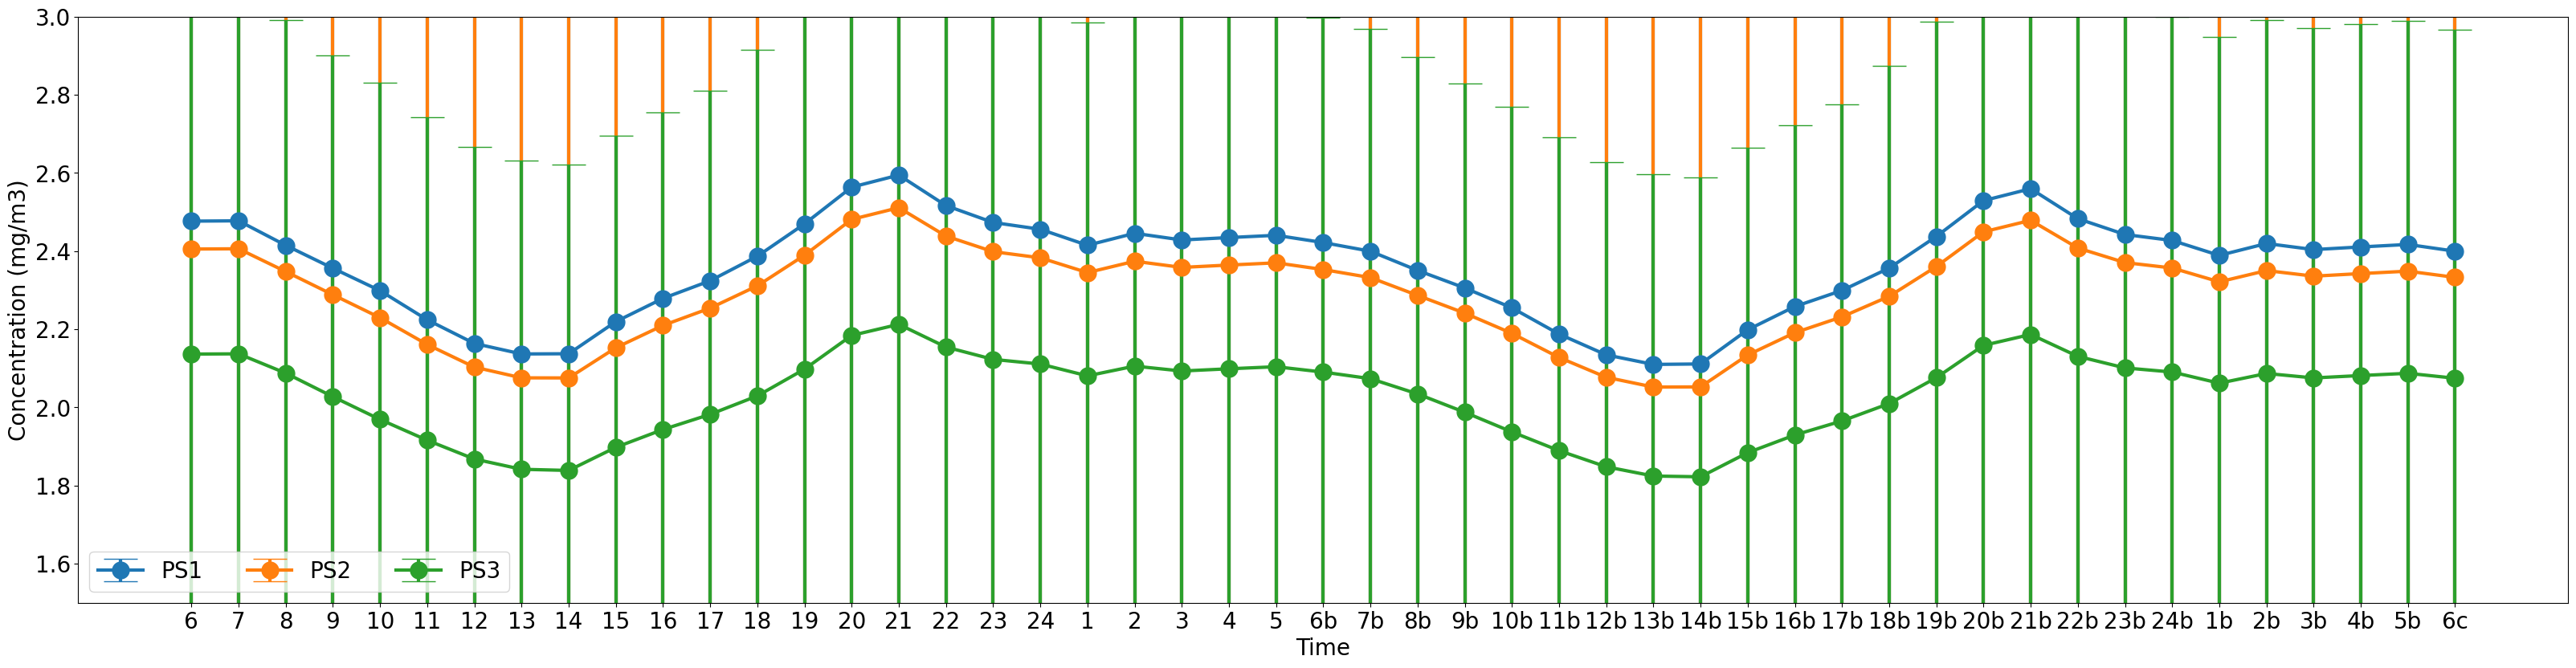

In [30]:
fig=plt.figure(figsize = fig_size)
ax=fig.add_subplot(111)
fig.subplots_adjust(bottom=0.15)
ax.set_ylabel(yaxis_name,fontsize=font_size)
ax.set_xlabel(xaxis_name,fontsize=font_size)
ax.tick_params(axis='both', which='both', labelsize=font_size)
ax.set_ylim(ylim)
for var in range(len(variables)-1):
    ax.errorbar(x=vector_horas,y=means[:,var],yerr=stds[:,var],fmt="-o",label=variables[var],capsize=cap_size,lw=line_width,markersize=marker_size)
ax.legend(loc="best",fontsize=font_size,ncols=len(variables)-1)
#fig.savefig(fig_name+formato)

In [31]:
variables = ["Turbulent Kinetic Energy (J/kg)"] + ["Area: Magnitude (m^2)"]
coords = ["X (m)", "Y (m)"] #coordenadas del plano
means=np.zeros((len(vector_segundos),len(variables)-1))
means[:]=np.nan
stds=np.copy(means)

In [32]:
for hour in range(len(vector_segundos)):
    print(vector_segundos[hour])
    try:
        df = pd.read_csv(path_to_folder+ustar+viento+str(vector_segundos[hour])+"_"+campo+part+".csv")     
        
        # Crear Dataset de xarray
        ds = xr.Dataset(
            {var: ("punto", df[var].values) for var in variables},  # Variables escalares
            coords={coord: ("punto", df[coord].values) for coord in coords},)

        for var in range(len(variables)-1):
            means[hour,var]=surface_average(ds,variables[var])
            stds[hour,var]=surface_std1(ds,variables[var])
        
    except FileNotFoundError:
        print("File Not Found for %i seconds" %vector_segundos[hour])
        
    

3600
7200
10800
14400
18000
21600
25200
28800
32400
36000
39600
43200
46800
50400
54000
57600
61200
64800
68400
72000
75600
79200
82800
86400
90000
93600
97200
100800
104400
108000
111600
115200
118800
122400
126000
129600
133200
136800
140400
144000
147600
151200
154800
158400
162000
165600
169200
172800
176400


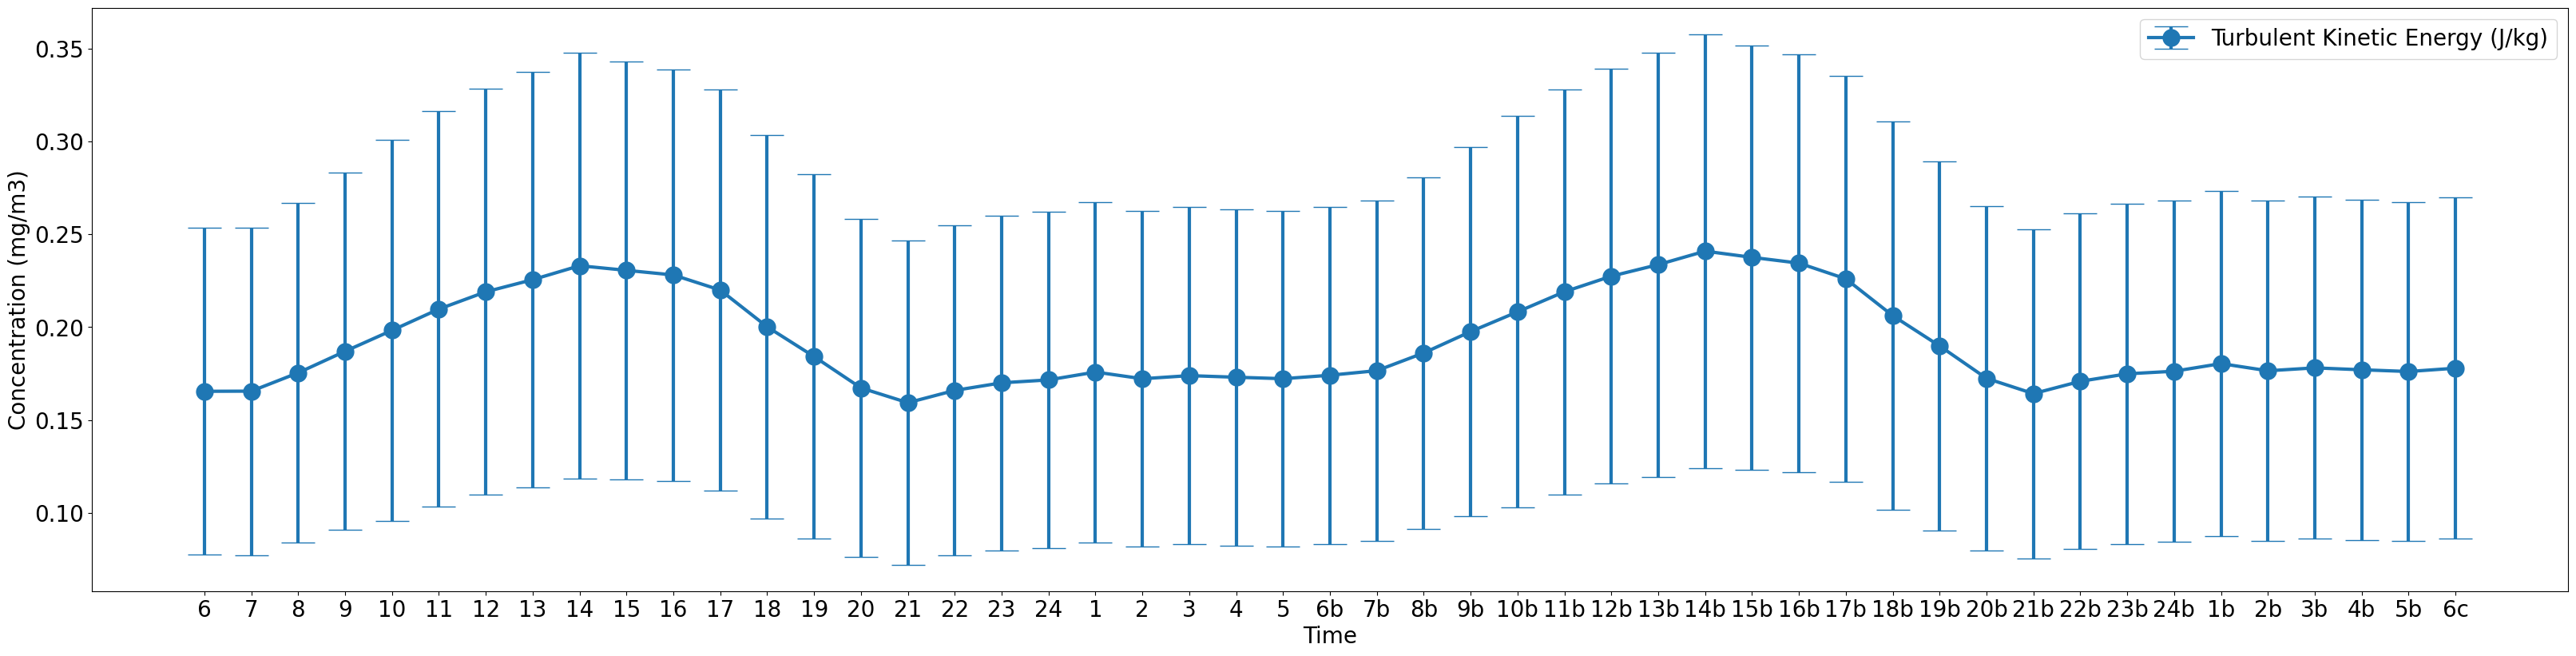

In [34]:
fig=plt.figure(figsize = fig_size)
ax=fig.add_subplot(111)
fig.subplots_adjust(bottom=0.15)
ax.set_ylabel(yaxis_name,fontsize=font_size)
ax.set_xlabel(xaxis_name,fontsize=font_size)
ax.tick_params(axis='both', which='both', labelsize=font_size)
#ax.set_ylim(ylim)
for var in range(len(variables)-1):
    ax.errorbar(x=vector_horas,y=means[:,var],yerr=stds[:,var],fmt="-o",label=variables[var],capsize=cap_size,lw=line_width,markersize=marker_size)
ax.legend(loc="best",fontsize=font_size,ncols=len(variables)-1)
#fig.savefig(fig_name+formato)

In [37]:
tke=means[:,var]

In [38]:
tke

array([0.16545238, 0.16553139, 0.17541755, 0.18699725, 0.19826554,
       0.20971646, 0.21901141, 0.22555212, 0.23304985, 0.23056449,
       0.22807458, 0.21994907, 0.20015459, 0.1841469 , 0.16725334,
       0.15930775, 0.16593863, 0.17001945, 0.17158277, 0.17581725,
       0.17220937, 0.17388532, 0.17302327, 0.17223806, 0.17409358,
       0.17656321, 0.18609681, 0.19758897, 0.20822785, 0.21904167,
       0.22742207, 0.23364463, 0.24089136, 0.23755344, 0.23445751,
       0.22599989, 0.20617566, 0.1898715 , 0.17241906, 0.16420196,
       0.17082443, 0.17485603, 0.17624953, 0.18036262, 0.17650209,
       0.17806113, 0.17703846, 0.17610119, 0.17788902])

In [42]:
means


array([[2.47662792, 2.40520482, 2.1363854 ],
       [2.47746426, 2.40591975, 2.13702395],
       [2.41464854, 2.34751166, 2.08757859],
       [2.35603182, 2.2882208 , 2.0273259 ],
       [2.29872923, 2.22946341, 1.96903912],
       [2.22410136, 2.16084932, 1.91585902],
       [2.1635629 , 2.10301663, 1.8677902 ],
       [2.13670576, 2.07558003, 1.84155286],
       [2.13726165, 2.0753342 , 1.83858838],
       [2.2195106 , 2.1526379 , 1.89778772],
       [2.27893157, 2.20975655, 1.94338807],
       [2.32410265, 2.2540821 , 1.98215984],
       [2.3868173 , 2.31105281, 2.02935484],
       [2.46958401, 2.38938296, 2.09782582],
       [2.56364024, 2.4811101 , 2.1841761 ],
       [2.59453717, 2.51104363, 2.21255046],
       [2.51642618, 2.43838192, 2.15435193],
       [2.47319619, 2.39851177, 2.1228281 ],
       [2.45585913, 2.38277135, 2.11093642],
       [2.41486783, 2.34493382, 2.08064584],
       [2.44554112, 2.3739955 , 2.10560481],
       [2.42841163, 2.35820493, 2.09308699],
       [2.

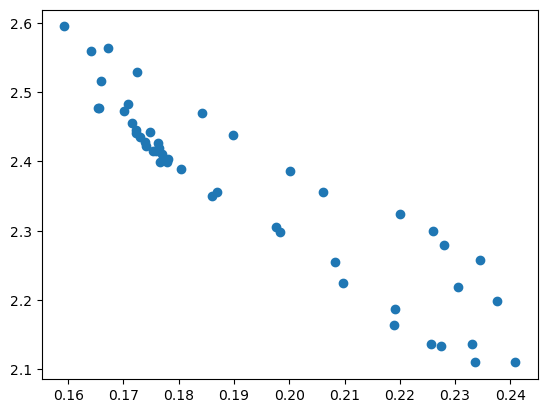

In [43]:
plt.scatter(tke,means[:,0])